<Axes: >

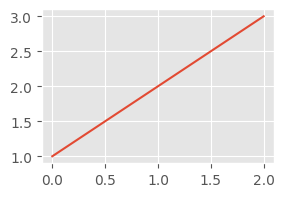

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.Series([1,2,3]).plot(figsize=(3,2))


# 데이터 불러오기

In [24]:
# df = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/main/advertising.csv')
df = pd.read_csv('../data/advertising.csv')

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# 다항회귀

## 변수 선택
* 3가지 독립변수 모두 선택

In [25]:
# -----------------------------------
# 독립변수, 종속변수 선택
# -----------------------------------
X = df[['TV','Radio','Newspaper']]
y = df['Sales']

## 훈련세트 테스트세트 분할

In [26]:
# ------------------------------------------
# 훈련세트, 테스트세트 분할
# ------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150, 3) (50, 3) (150,) (50,)


## 다항변환

In [27]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=9, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [28]:
print(X_train_poly.shape)
print(X_test_poly.shape)

(150, 219)
(50, 219)


<Axes: >

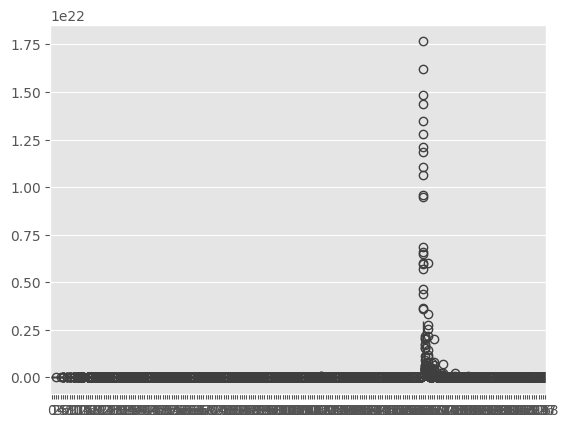

In [29]:
sns.boxplot(X_train_poly)

## 스케일링

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

<Axes: >

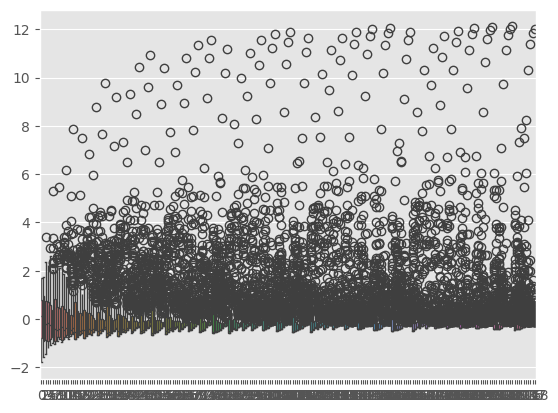

In [31]:
sns.boxplot(X_train_poly_scaled)

## 모델 생성 및 훈련

In [32]:
# ------------------------------------------
# LinearRegression 클래스 import
# ------------------------------------------
from sklearn.linear_model import LinearRegression

# ------------------------------------------
# 모델객체 생성하기
# ------------------------------------------
model = LinearRegression()

# ------------------------------------------
# 훈련데이터로 모델 훈련하기
# ------------------------------------------
model.fit(X_train_poly_scaled, y_train)


LinearRegression()

## 평가

In [33]:
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    root_mean_squared_error,
    r2_score,
)

# -----------------------------------
# 테스트데이터의 예측값
# -----------------------------------
pred = model.predict(X_test_poly_scaled)

# -----------------------------------
# 모델 평가
# -----------------------------------
mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print("===다항회귀 모델의 평가결과===")
print(f"R2: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")

===다항회귀 모델의 평가결과===
R2: -19055398.13
RMSE: 22759.87
MAE: 3745.98
MSE: 518011497.68


/Users/j1star/Desktop/MS AI Projects/microsoft-ai-school/.venv/lib/python3.11/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/j1star/Desktop/MS AI Projects/microsoft-ai-school/.venv/lib/python3.11/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/j1star/Desktop/MS AI Projects/microsoft-ai-school/.venv/lib/python3.11/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [34]:
model.score(X_train_poly_scaled, y_train)

/Users/j1star/Desktop/MS AI Projects/microsoft-ai-school/.venv/lib/python3.11/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/j1star/Desktop/MS AI Projects/microsoft-ai-school/.venv/lib/python3.11/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/j1star/Desktop/MS AI Projects/microsoft-ai-school/.venv/lib/python3.11/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


1.0

In [35]:
model.score(X_test_poly_scaled, y_test)

/Users/j1star/Desktop/MS AI Projects/microsoft-ai-school/.venv/lib/python3.11/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/j1star/Desktop/MS AI Projects/microsoft-ai-school/.venv/lib/python3.11/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/j1star/Desktop/MS AI Projects/microsoft-ai-school/.venv/lib/python3.11/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


-19055398.13117698

## 규제

In [36]:
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=10)
model_ridge.fit(X_train_poly_scaled, y_train)

/Users/j1star/Desktop/MS AI Projects/microsoft-ai-school/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/j1star/Desktop/MS AI Projects/microsoft-ai-school/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/j1star/Desktop/MS AI Projects/microsoft-ai-school/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Ridge(alpha=10)

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

# -----------------------------------
# 테스트데이터의 예측값
# -----------------------------------
pred = model_ridge.predict(X_test_poly_scaled)

# -----------------------------------
# 모델 평가
# -----------------------------------
mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print("===릿지 모델의 평가결과===")
print(f"R2: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")

===릿지 모델의 평가결과===
R2: 0.93
RMSE: 1.41
MAE: 1.09
MSE: 2.00


/Users/j1star/Desktop/MS AI Projects/microsoft-ai-school/.venv/lib/python3.11/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/j1star/Desktop/MS AI Projects/microsoft-ai-school/.venv/lib/python3.11/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/j1star/Desktop/MS AI Projects/microsoft-ai-school/.venv/lib/python3.11/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
